# Trabajo semanal 9
## Laboratorio de filtros digitales
***Juan Costa Suárez***

---

### Enunciado:

#### Parte 1 - Diseño de filtros

Se necesita eliminar las interferencias de una señal electrocardiográfica (ECG) que fue registrada a una frecuencia de muestreo de 1 kHz. Para ello se propone la siguiente plantilla de diseño:

![imagen](img/plantilla.jpg)

y se pide diseñar dos filtros: uno IIR y otro FIR que cumplan con la plantilla, utilizando alguno de los métodos estudiados. Mostrar la respuesta en frecuencia, para ambos filtros, de:

a) módulo,

b) fase

c) retardo

d) y respuesta al impulso.


#### Parte II - Implementación y uso

En esta parte utilizaremos los dos filtros diseñados para mitigar las interferencias. Para ello se dispone de un notebook de referencia para facilitar la experimentación.


In [1]:
#%matplotlib qt5
%matplotlib widget

import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from splane import plot_plantilla, analyze_sys
import numpy as np 


In [2]:
fs = 1000 # Hz
nyq_frec = fs / 2

ripple = 0.5 # dB
atenuacion = 40 # dB

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz

den = 1.0

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec

gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)

w_rad  = np.append(np.logspace(-2, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w_rad  = np.append(w_rad, np.linspace(40, nyq_frec, 500, endpoint=True) ) / nyq_frec * np.pi

w = w_rad / np.pi * nyq_frec

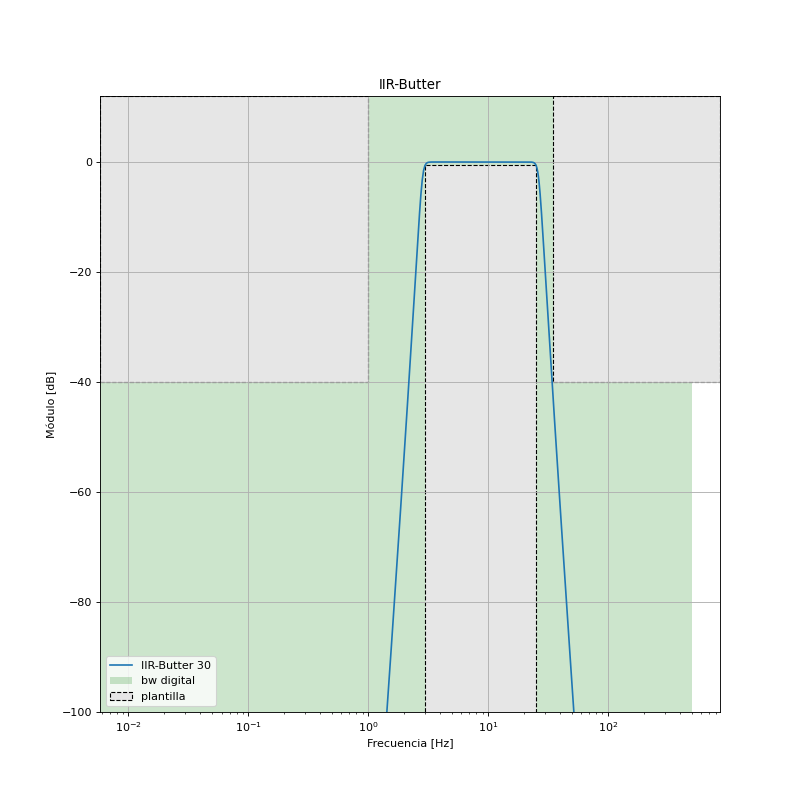

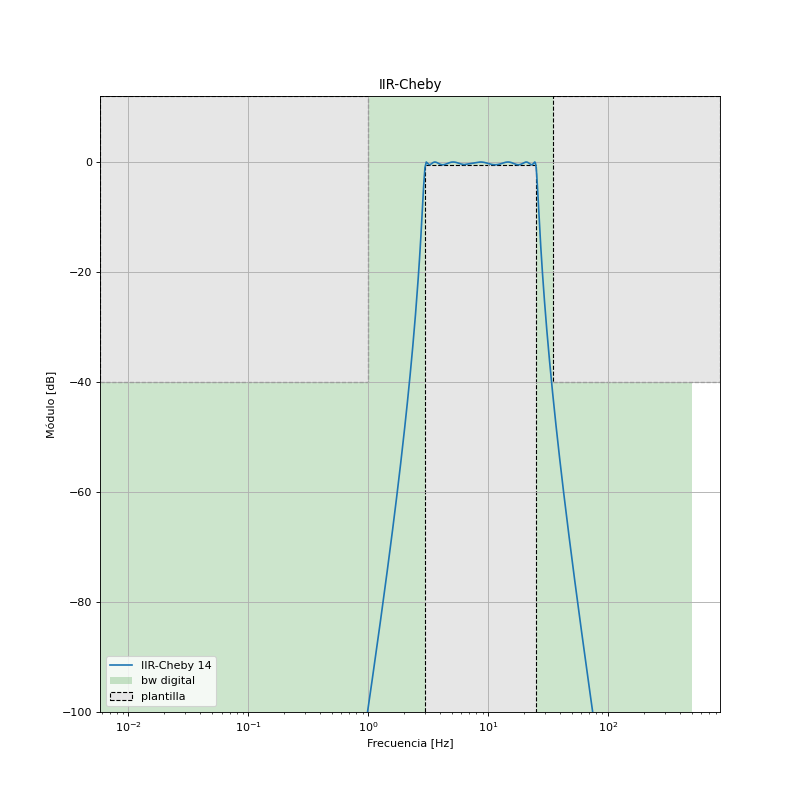

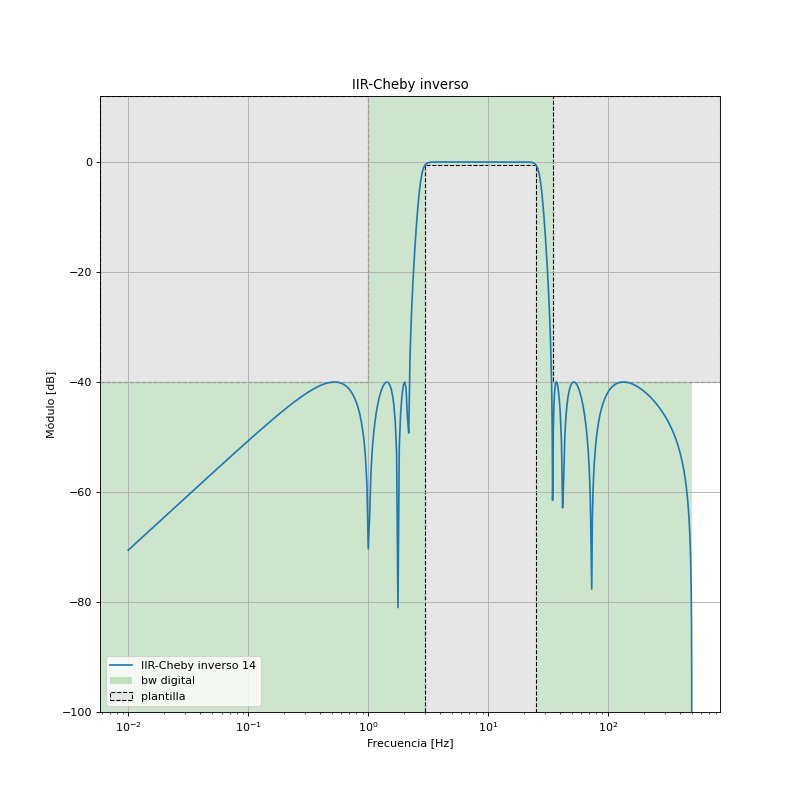

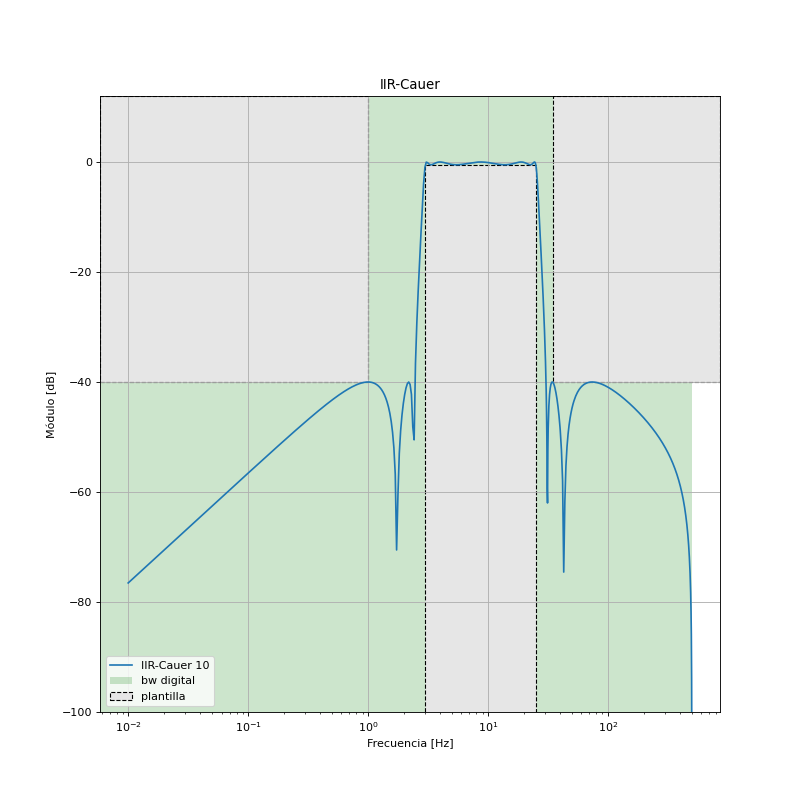

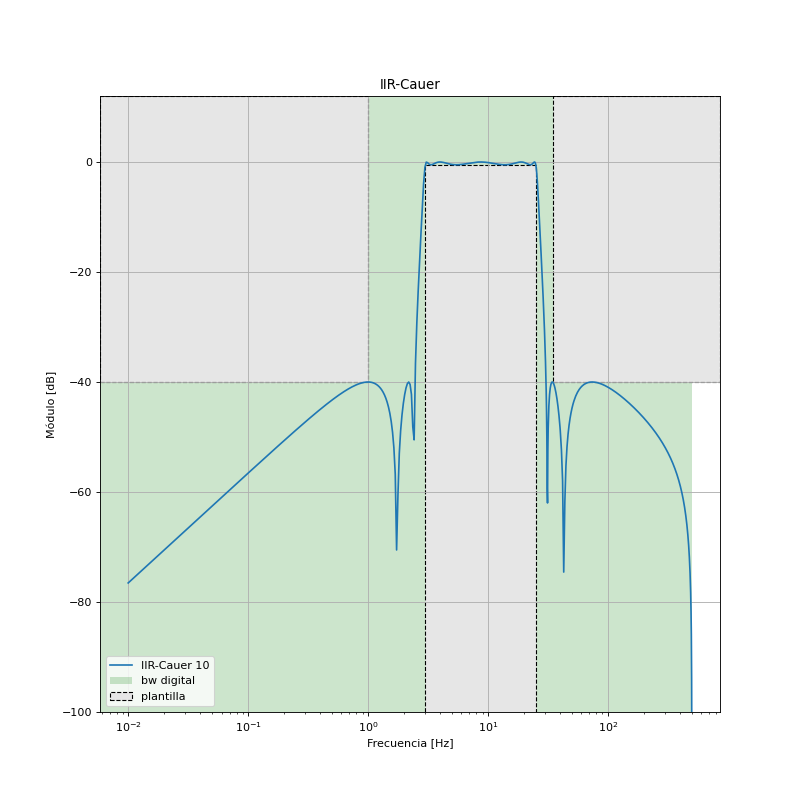

In [3]:
# Construyo las sos del filtro

# butter
bp_sos_butter = sig.iirdesign(wp=np.array([wp1, wp2]) / nyq_frec, ws=np.array([ws1, ws2]) / nyq_frec, gpass=0.5, gstop=40., analog=False, ftype='butter', output='sos')

# Cheby
bp_sos_cheby1 = sig.iirdesign(wp=np.array([wp1, wp2]) / nyq_frec, ws=np.array([ws1, ws2]) / nyq_frec, gpass=0.5, gstop=40., analog=False, ftype='cheby1', output='sos')

# Cheby Inverso
bp_sos_cheby2 = sig.iirdesign(wp=np.array([wp1, wp2]) / nyq_frec, ws=np.array([ws1, ws2]) / nyq_frec, gpass=0.5, gstop=40., analog=False, ftype='cheby2', output='sos')

# Cauer
bp_sos_cauer = sig.iirdesign(wp=np.array([wp1, wp2]) / nyq_frec, ws=np.array([ws1, ws2]) / nyq_frec, gpass=0.5, gstop=40., analog=False, ftype='ellip', output='sos')

# IIR-Butter
plt.figure(figsize=(10, 10), dpi=80)
_, h_butter = sig.sosfreqz(bp_sos_butter, w_rad)
plt.semilogx(w, 20*np.log10(np.abs(h_butter)+1e-12), label='IIR-Butter {:d}'.format(bp_sos_butter.shape[0]*2))
plt.title("IIR-Butter")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()

# Grafico la plantilla
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

# IIR-Cheby
plt.figure(figsize=(10, 10), dpi=80)
_, h_cheby1 = sig.sosfreqz(bp_sos_cheby1, w_rad)
plt.semilogx(w, 20*np.log10(np.abs(h_cheby1)+1e-12), label='IIR-Cheby {:d}'.format(bp_sos_cheby1.shape[0]*2) )
plt.title("IIR-Cheby")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()

# Grafico la plantilla
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

# IIR-Cheby inverso
plt.figure(figsize=(10, 10), dpi=80)
_, h_cheby2 = sig.sosfreqz(bp_sos_cheby2, w_rad)
plt.semilogx(w, 20*np.log10(np.abs(h_cheby2)+1e-12), label='IIR-Cheby inverso {:d}'.format(bp_sos_cheby2.shape[0]*2) )
plt.title("IIR-Cheby inverso")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()

# Grafico la plantilla
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

# IIR-Cauer
plt.figure(figsize=(10, 10), dpi=80)
_, h_cauer = sig.sosfreqz(bp_sos_cauer, w_rad)
plt.semilogx(w, 20*np.log10(np.abs(h_cauer)+1e-12), label='IIR-Cauer {:d}'.format(bp_sos_cauer.shape[0]*2) )
plt.title("IIR-Cauer")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()

# Grafico la plantilla
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

plt.show()

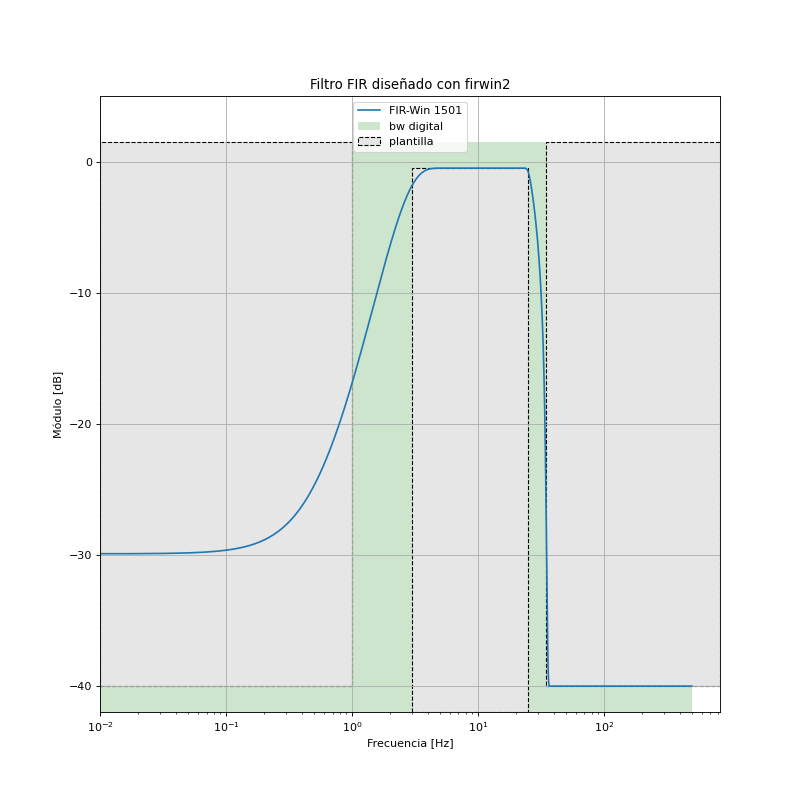

In [4]:
cant_coeficientes = 1501
den = 1.0

num_win = sig.firwin2(cant_coeficientes, frecs, gains , window='blackmanharris', nfreqs =  cant_coeficientes+1)

w_aux, hh = sig.freqz(num_win, den,worN=30000, fs=fs)

plt.figure(figsize=(10, 10), dpi=80)

plt.semilogx(w_aux, 20 * np.log10(abs(hh)), label='FIR-Win {:d}'.format(num_win.shape[0]))

plt.title('Filtro FIR diseñado con firwin2')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()

axes_hdl = plt.gca()
axes_hdl.legend()
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)


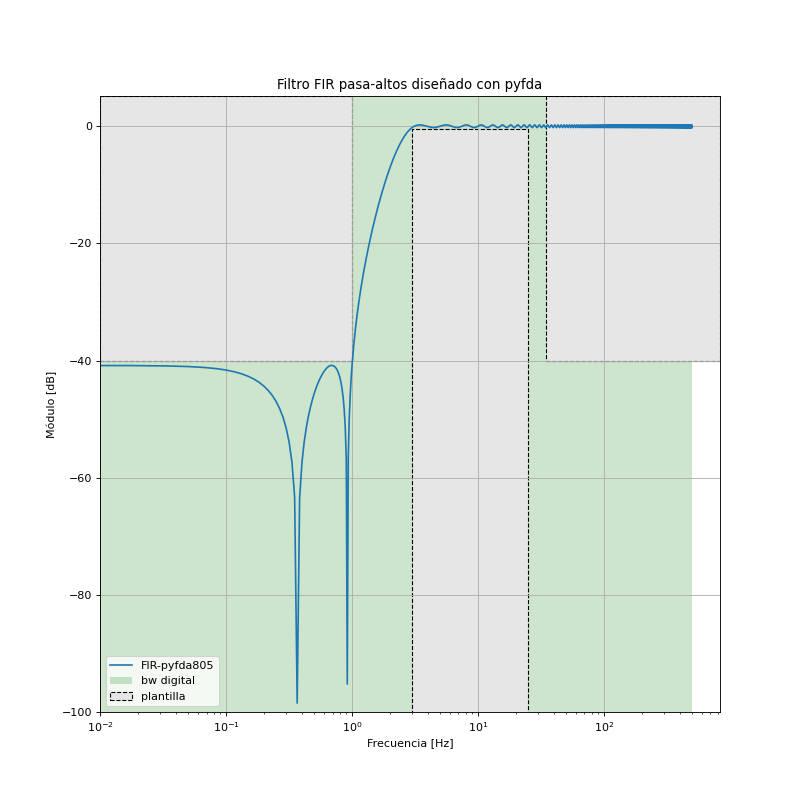

In [5]:
# Pyfda
array_pasa_altos = np.load('pyfda/array_pasa_altos.npy')[0].astype(np.float64)
w_aux, hh = sig.freqz(array_pasa_altos, den,worN=30000, fs=fs)

plt.figure(figsize=(10, 10), dpi=80)

plt.semilogx(w_aux, 20 * np.log10(abs(hh)), label='FIR-pyfda{:d}'.format(array_pasa_altos.shape[0]))

plt.title('Filtro FIR pasa-altos diseñado con pyfda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.gca()
plt.legend()
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)


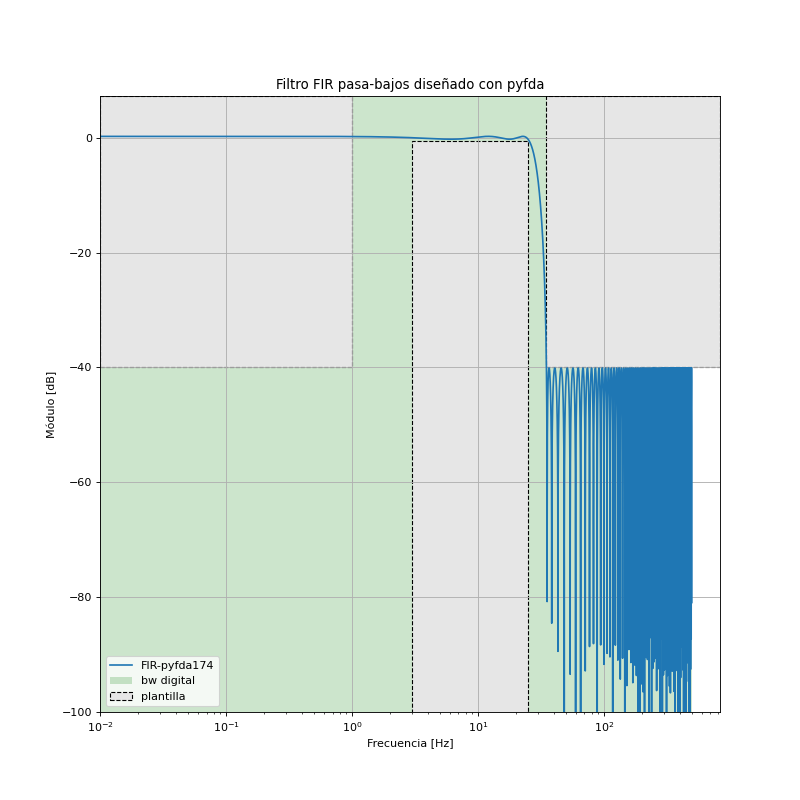

In [6]:
# Pyfda
array_pasa_bajos = np.load('pyfda/array_pasa_bajos.npy')[0].astype(np.float64)
w_aux, hh = sig.freqz(array_pasa_bajos, den,worN=30000, fs=fs)

plt.figure(figsize=(10, 10), dpi=80)

plt.semilogx(w_aux, 20 * np.log10(abs(hh)), label='FIR-pyfda{:d}'.format(array_pasa_bajos.shape[0]))

plt.title('Filtro FIR pasa-bajos diseñado con pyfda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)


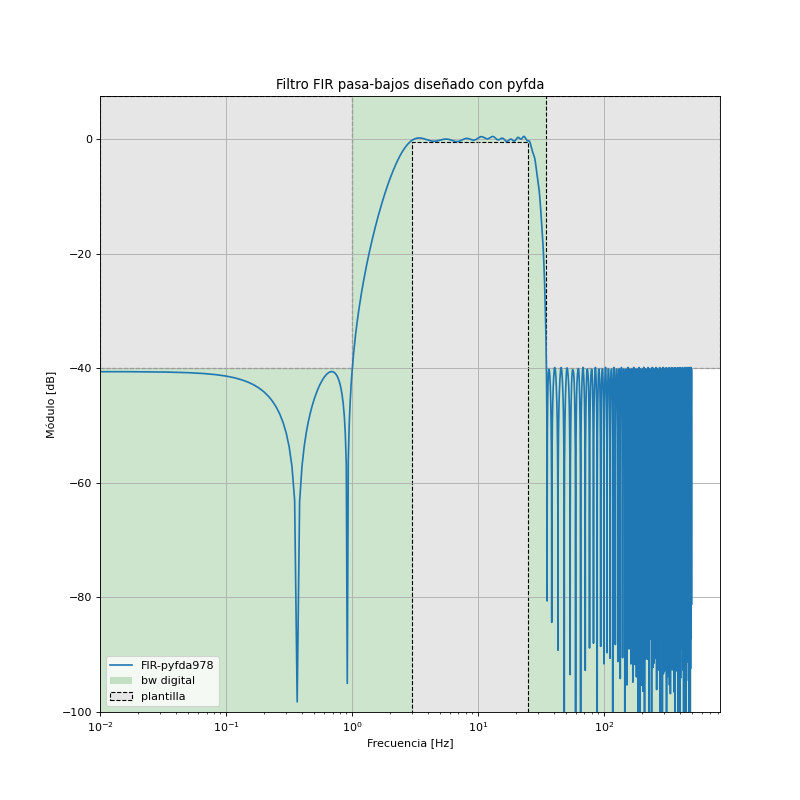

In [7]:
# Convolución pasa alto - pasa bajo
convolution_pyfda = np.convolve(array_pasa_altos,array_pasa_bajos)

w_aux, hh = sig.freqz(convolution_pyfda, den,worN=30000, fs=fs)

plt.figure(figsize=(10, 10), dpi=80)

plt.semilogx(w_aux, 20 * np.log10(abs(hh)), label='FIR-pyfda{:d}'.format(convolution_pyfda.shape[0]))

plt.title('Filtro FIR pasa-bajos diseñado con pyfda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)


# Desventajas de este método:

Las desventajas de generar dos filtros y convolucionarlos es que en la zona de la banda, el riple se puede sumar aditivamente con los dos filtros generandonos formas no deseadas en la zona. O sea que no podemos asegurar que se mantenga el mismo ripple máximo que en los dos filtros por separado. En la banda de stop podemos decir lo mismo, pero en esta zona los ripples de los filtros anteriores son casi inexistentes y aportan muy poco a la suma.

![imagen](img/Banda_Fir_Convolucion.png)



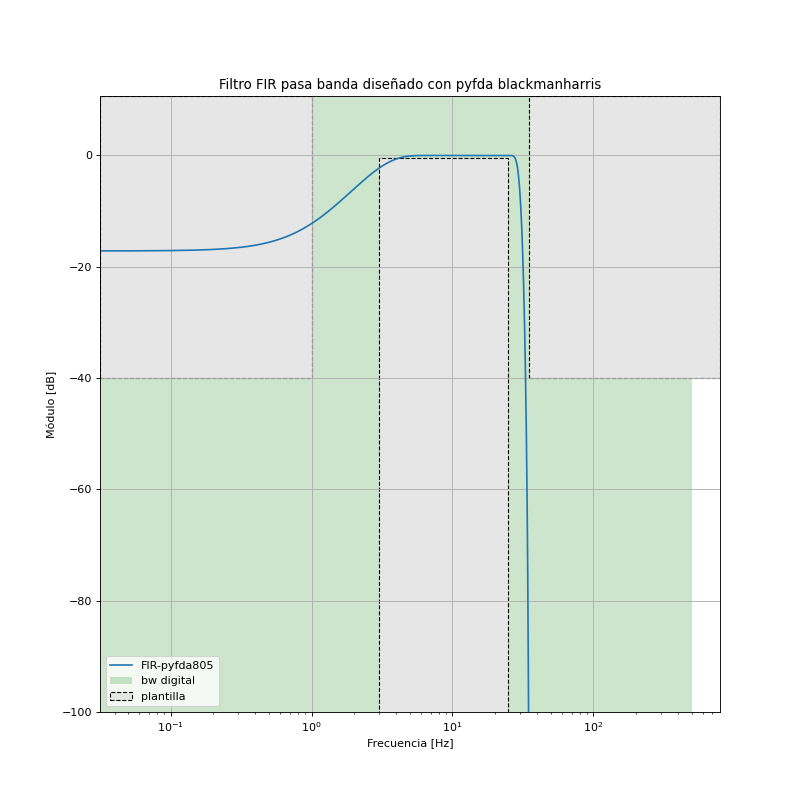

In [8]:
# Pyfda blackmanharris
array_blackmanharris = np.load('pyfda/array_pasa_banda_blackmanharris.npy')[0].astype(np.float64)

w_aux, hh = sig.freqz(array_blackmanharris, den,worN=10000, fs=fs)

plt.figure(figsize=(10, 10), dpi=80)

plt.semilogx(w_aux, 20 * np.log10(abs(hh)), label='FIR-pyfda{:d}'.format(array_blackmanharris.shape[0]))

plt.title('Filtro FIR pasa banda diseñado con pyfda blackmanharris')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)


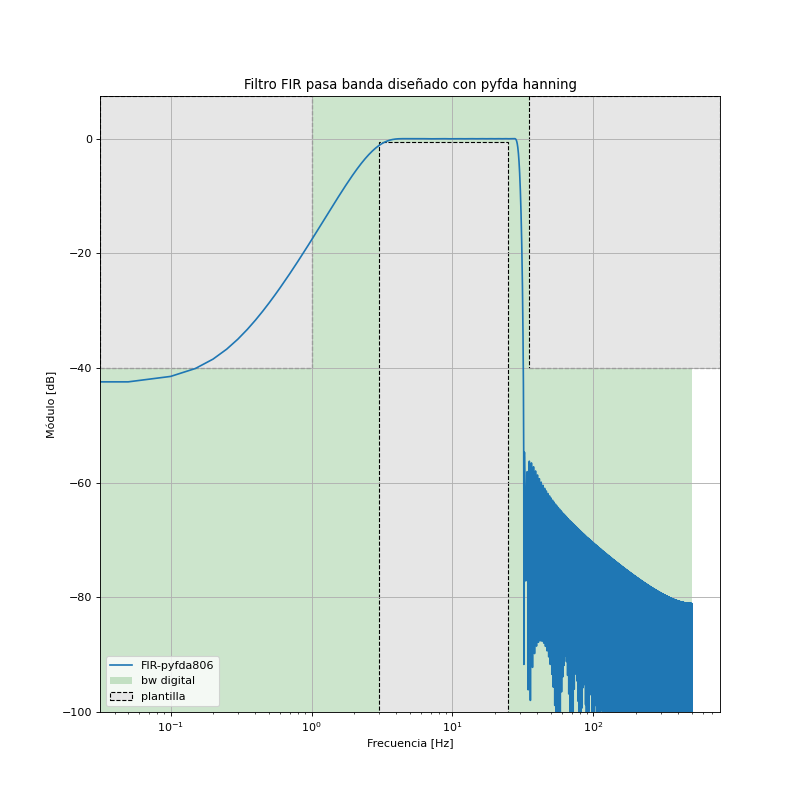

In [9]:
# Pyfda blackmanharris
import pandas

array_hanning = np.load('pyfda/array_pasa_banda_hanning.npy')[0].astype(np.float64)

w_aux, hh = sig.freqz(array_hanning, den,worN=10000, fs=fs)

plt.figure(figsize=(10, 10), dpi=80)

plt.semilogx(w_aux, 20 * np.log10(abs(hh)), label='FIR-pyfda{:d}'.format(array_hanning.shape[0]))

plt.title('Filtro FIR pasa banda diseñado con pyfda hanning')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.xlim()
plt.grid()
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)


In [10]:
# para listar las variables que hay en el archivo
#io.whosmat('ecg.mat')
mat_struct = sio.loadmat('ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)
fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

# demora = int(...)
# calcule la demora para cada caso, dicha demora adelantará la señal de salida, como puede ver más abajo.
demora = 750

ECG_f_win = sig.lfilter(num_win, den, ecg_one_lead)


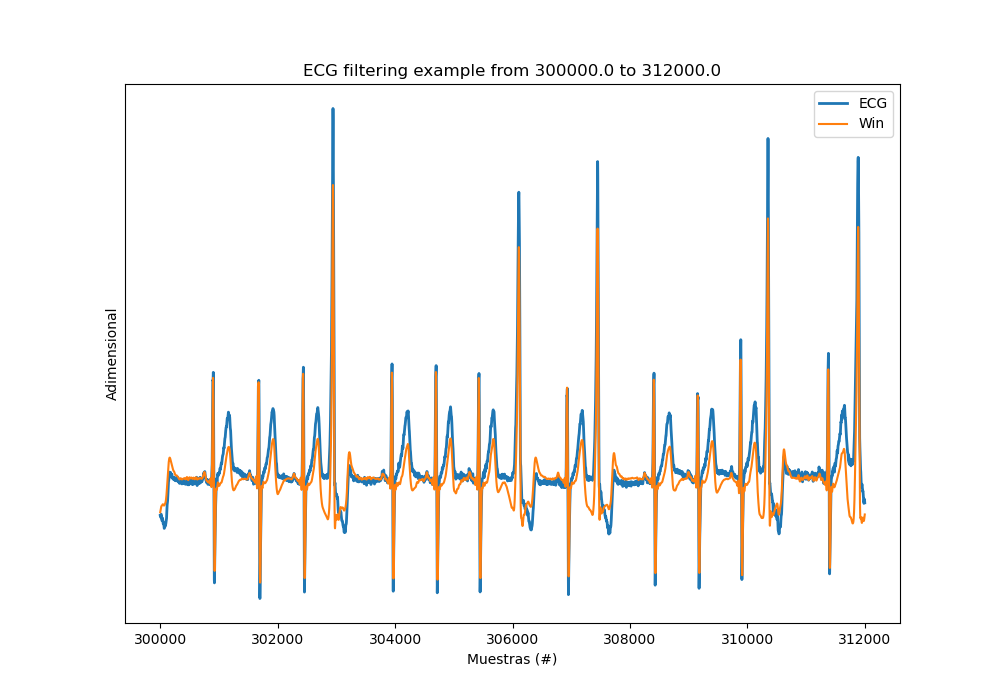

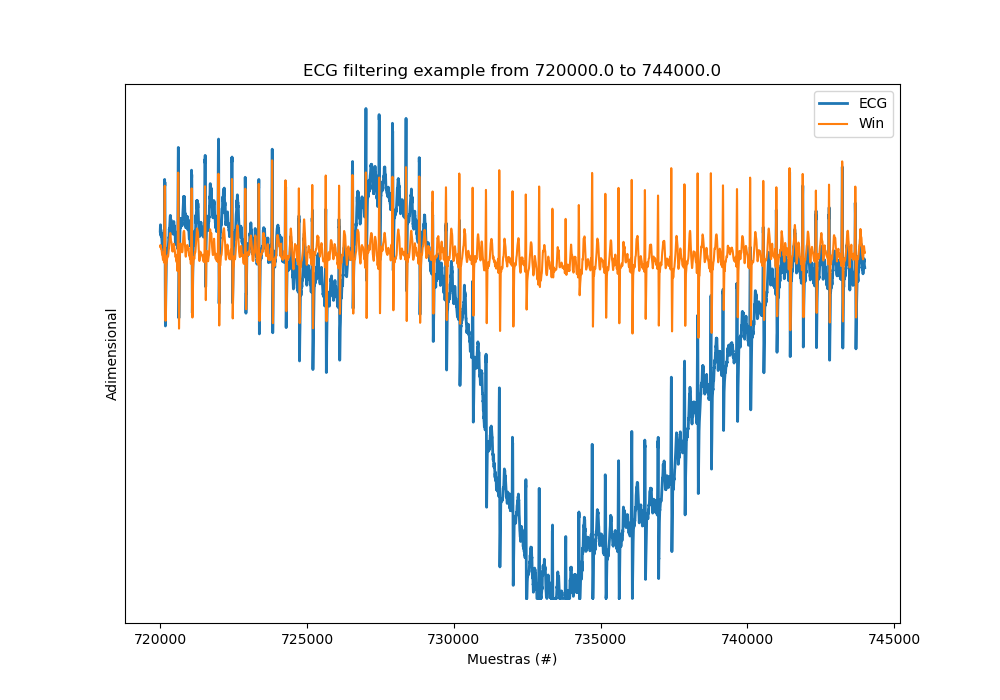

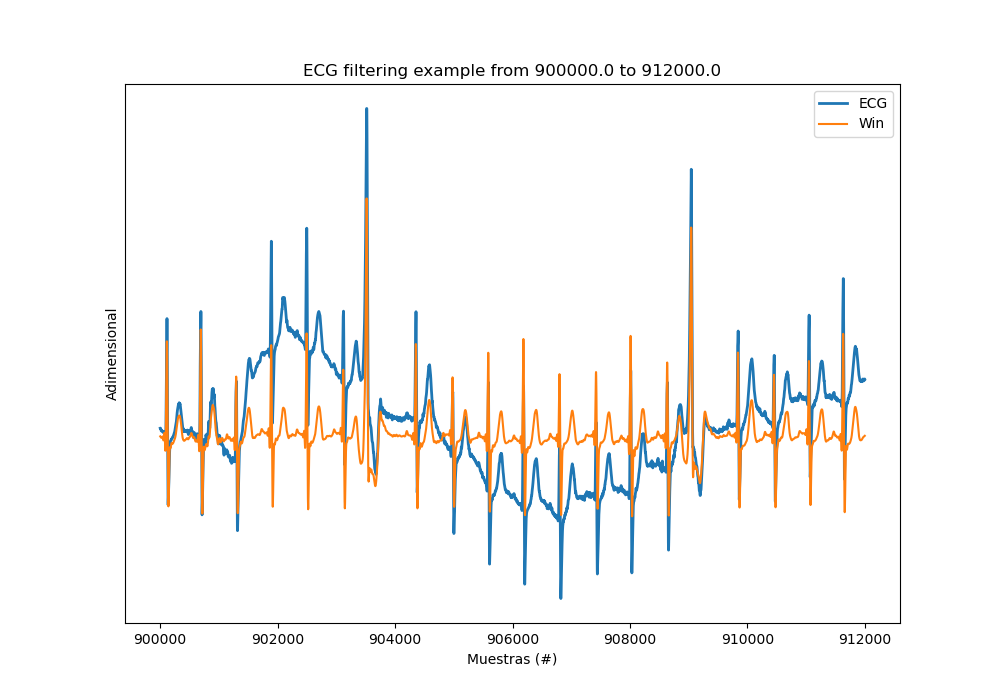

In [11]:

# Segmentos de interés con ALTA contaminación

regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

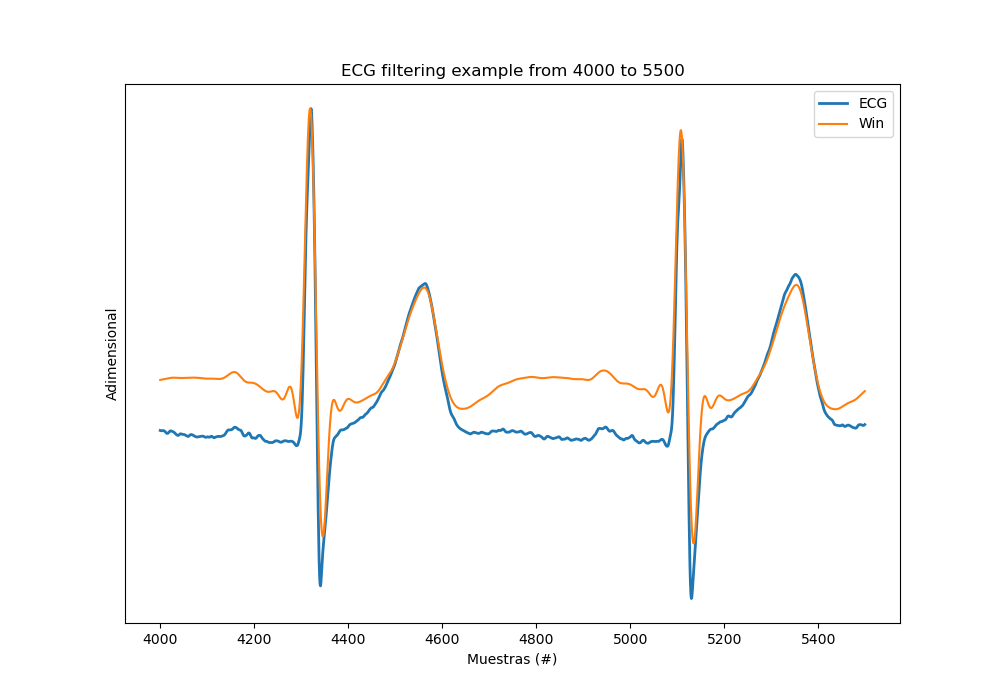

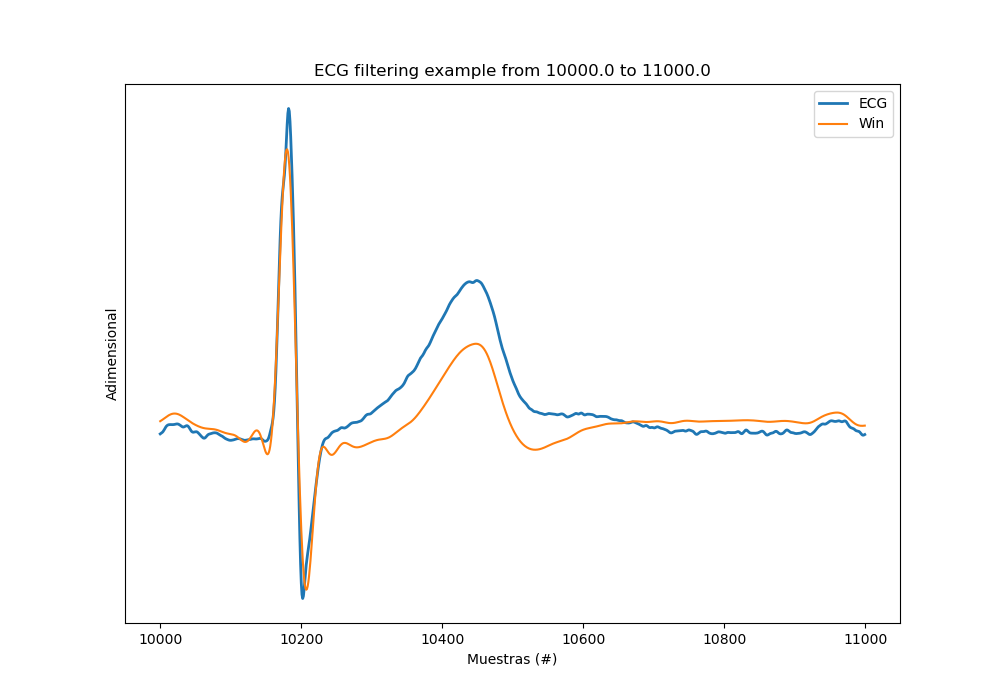

In [12]:
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

# Última parte:

Intento empírico de encontrar mejores caracterísiticas del filtro. 
Observando el ECG sin filtrar me encuentro con pequeñas ondulaciones de alta frecuencia en la señal. Para lograr que esas componentes se vean reflejadas luego del filtrado debo subir la frecuencia de corte y stop a más de la frecuencia de esa señal. Esas pequeñas ondulaciones tienen una frecuencia de aproximadamente 50 Hz, por lo que se estableción el corte en 60Hz. Además en las bajas frecuencias también tenemos información importante, pero en esas frecuencias también tenemos la mayor energía de ruido. Por lo que es muy complicado mantener la señal original y sacarnos el ruido por los métodos que estamos viendo. Igualmente se elije una frecuencia de corte de 1,5, y se logran mejores objetivos que con los 3Hz que se tenía antes.

![imagen](img/Banda_Fir_Convolucion_Modificado.png)


In [13]:
import scipy.fftpack


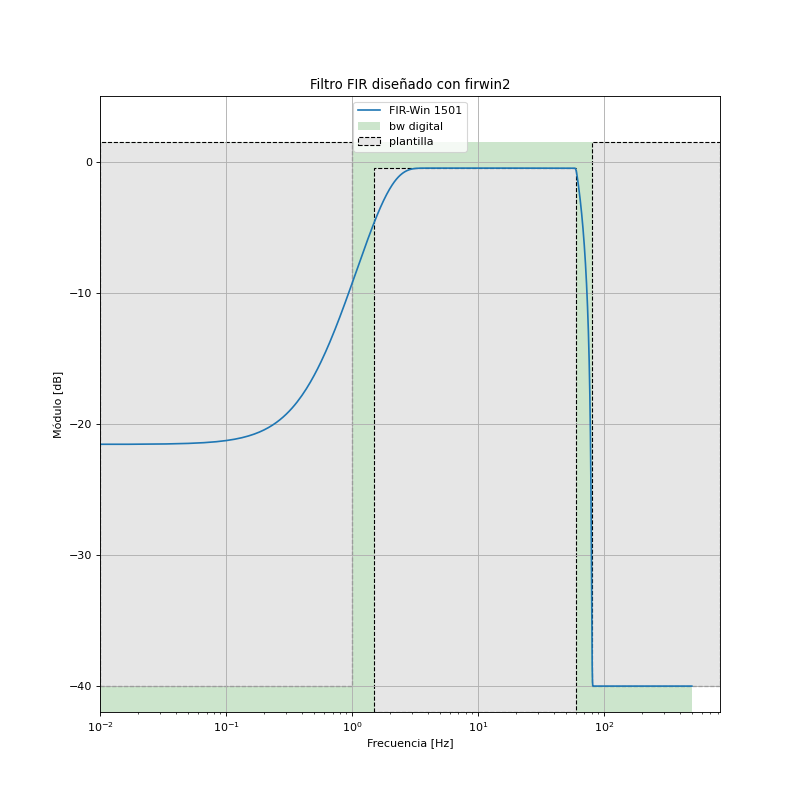

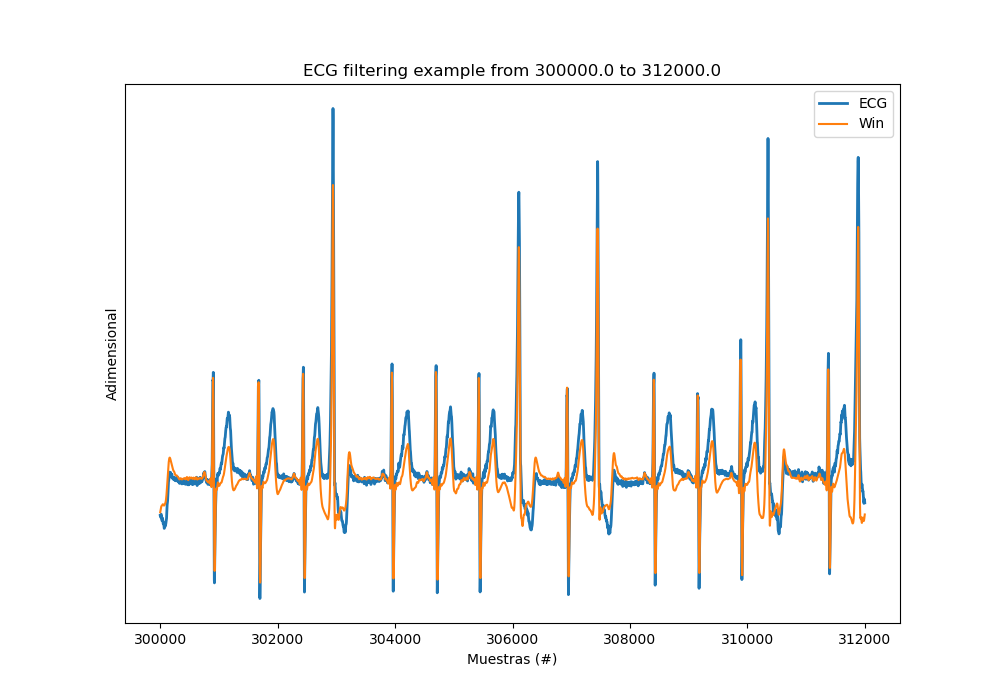

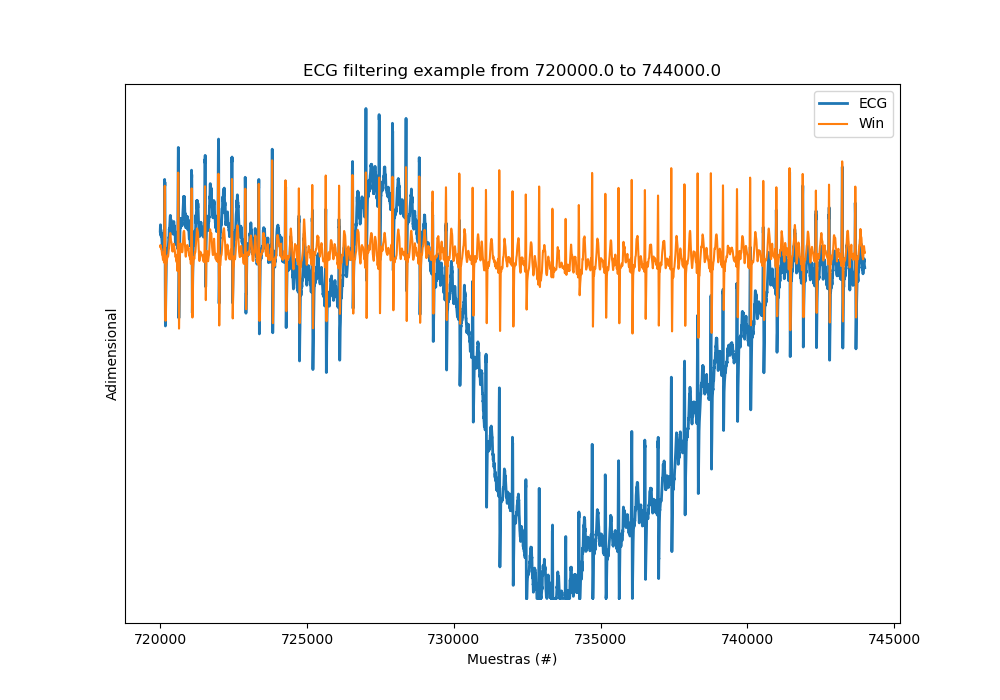

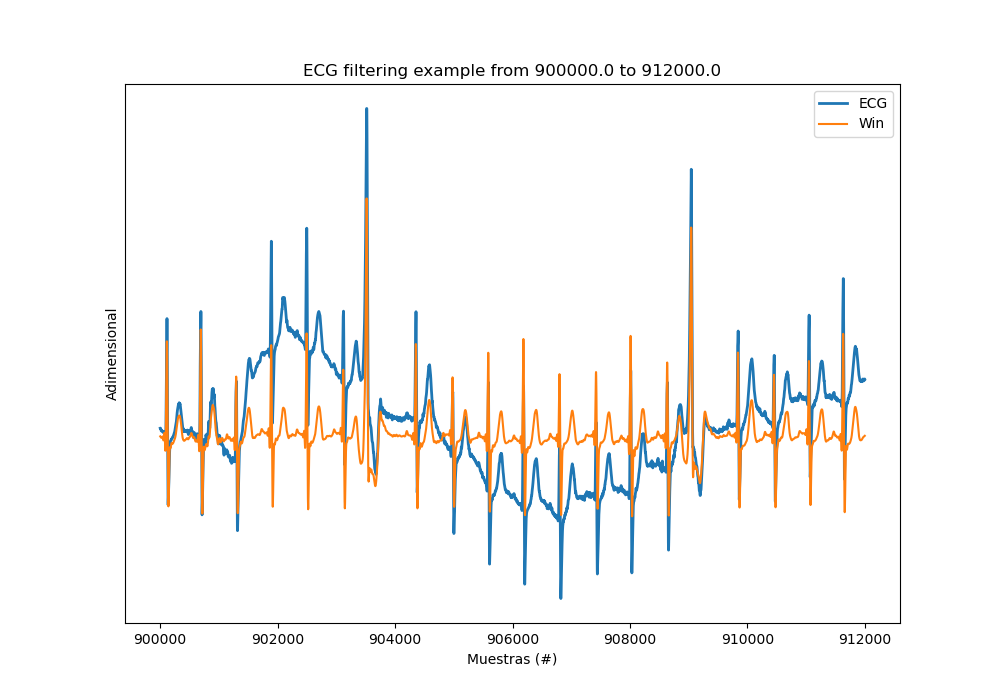

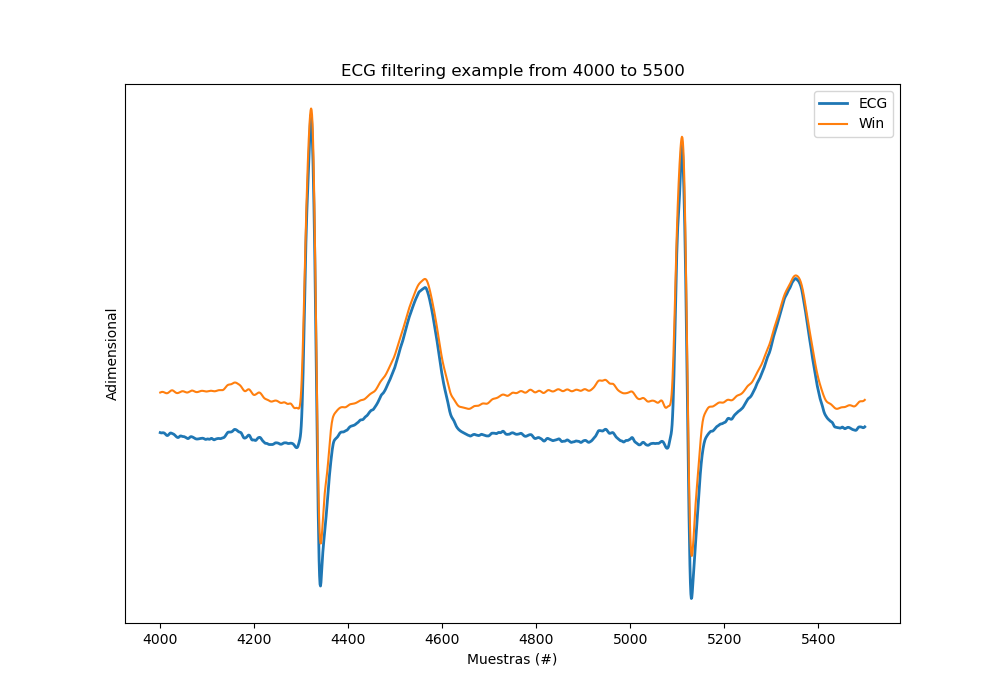

C:\Users\juanc\AppData\Local\Temp/ipykernel_52020/941942285.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')


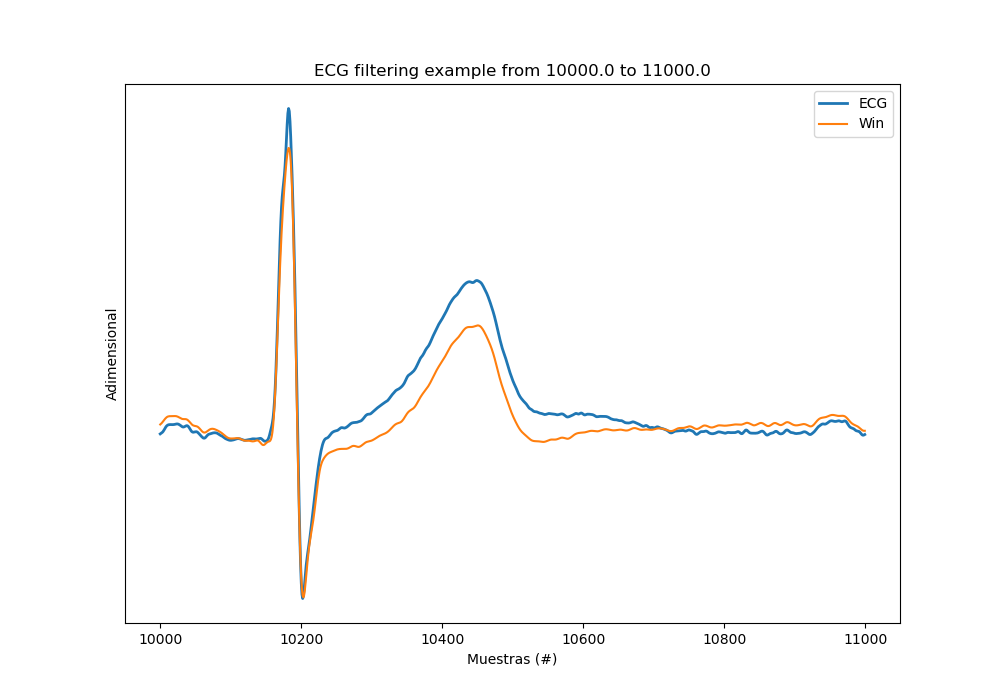

In [14]:
fs = 1000 # Hz
nyq_frec = fs / 2

ripple = 0.5 # dB
atenuacion = 40 # dB

ws1 = 1 #Hz
wp1 = 1.5 #Hz
wp2 = 60.0 #Hz
ws2 = 80.0 #Hz

den = 1.0

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec

gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)

w_rad  = np.append(np.logspace(-2, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w_rad  = np.append(w_rad, np.linspace(40, nyq_frec, 500, endpoint=True) ) / nyq_frec * np.pi

w = w_rad / np.pi * nyq_frec

cant_coeficientes = 1501
den = 1.0

num_win = sig.firwin2(cant_coeficientes, frecs, gains , window='blackmanharris', nfreqs =  cant_coeficientes+1)

w_aux, hh = sig.freqz(num_win, den,worN=30000, fs=fs)

plt.figure(figsize=(10, 10), dpi=80)

plt.semilogx(w_aux, 20 * np.log10(abs(hh)), label='FIR-Win {:d}'.format(num_win.shape[0]))

plt.title('Filtro FIR diseñado con firwin2')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()

axes_hdl = plt.gca()
axes_hdl.legend()
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

#plt.figure(figsize=(10, 10), dpi=80)

# Number of samplepoints
N = ecg_one_lead.size
# sample spacing
T = 1/fs
x = np.linspace(0.0, N*T, N)
y = ecg_one_lead
yf = 2.0/N * scipy.fftpack.fft(y)[:N//2]
yf = np.log(np.abs(yf))
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.semilogx(xf,  yf)

# Segmentos de interés con ALTA contaminación

regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()
    
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )
ECG_f_win = sig.lfilter(num_win, den, ecg_one_lead)

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()